# Links to play list resources
* 1- Python for Data Analysis: Getting Started (Basics)
https://www.youtube.com/watch?v=2_6O39UdFi0&list=PLiC1doDIe9rCYWmH9wIEYEXXaJ4KAi3jc&ab_channel=DataDaft
* 2- Time series Basic
https://www.youtube.com/playlist?list=PL3N9eeOlCrP5cK0QRQxeJd6GrQvhAtpBK
* 3- Good channel for beginers
https://www.youtube.com/@KeithGalli/videos
* 4- Data science good explonation
https://www.youtube.com/@dataranger7582/videos


* https://www.youtube.com/watch?v=jkrNMKz9pWU&ab_channel=JeremyHoward

* Aboud SVD (Singular matrix decomposition)
* https://www.youtube.com/watch?v=xy3QyyhiuY4&ab_channel=SteveBrunton


* Time Series Data - a sequence of information which attaches a time period to each value
* All time period must be equal and learly defined which would result in a Constant Frequency.
* We express Time Series Data with capital letters X and Y. X-like price of S&P 500 stocks or T-entire time interval. t- for single period.
* Xt- the price of particular day-interval. or Xt-1 as previous period.
* *********************
* 1- interval between different observations need to be identical. The values betwen consecuative periods sually affect each other. 
* 2- for month analysis we need to compute some average values for each day. 
* we have to devide data on training and testing data. In time series we take cutoff point (period before cutoff point is training data, period after cutoff point is testing data).
* THIS TIME-SERIES do not follow any standard distributions. TS never satisfies GAUSS-MARKOV assumptions (unlike linear regression data). 
* VISUALISATION
* df_comp.spx.plot(figsize=(width, height), title="S&P 500 Prices")
* plt.show()
*************************
* import scipy.stats 
* import pylab
* QQ (quantile quantile) plot to know what density of a data and which values more likely to occure
* scipy.stats.probplot(data_series.column, plot=pylab) # we can choose different method (not pylab)
* QQ takes all values and arrange them in ascending order
* pylab.show()
* Y-axis is prices (parameter) low-min and high is max. Then X-axis is quantiles (How many standard deviations away from the mean these values are). RED line shows which points should follow is they are normally istributed. 
* 

# some coomand for reading data
* 1- raw_csv = pd.read_csv('C/myFolder/csv_file_name.csv') # command for reading data in file system
* 2- df_copy = raw_csv.copy() # copy the original data
* 3- df_copy.head() # head(n)- method by default shows 5 first data values, or we can predefine n=5...30..etc
* 4- df_copy.describe() -  gives a brief statistics of input data set
* 5- df_copy.isna() - return True for N/A (NaN) values and False for numeric values.
* 6- df_copy.isna().sum() - we should find a number of missing elemnets. 
* 7- df_copy.name_col.isna().sum() - if we want counting N/A values for particular data set.
*******************************************************
* Transform data column to the date type, because we could not include it in statistics
* df_copy.date.describe() # first data are completle arbitrary
* pd.to_datetime(df_copy.date, dayfirst=True) 
* then save date in dataframe: df_copy.date = pd.to_datetime(df_copy.date, dayfirst=True) 
* replace default indeces with date value: df_copy.set_index("date", inplace=True)
*************************************************************
* 


# Missing values
# Insert a time frequency to dataset
* h-means data are written hourly, 'w'-weekly, 'd'-daily, m-monthly, Data measured once per year is "annual", not yearly. Then we use 'a'-letter.
* df_copy = df_copy.asfreq('d'). we put in parenthesis in the end. it add new rows with days, but values will be NaN
* closing prices can be recorded only during working days.
* df_copy = df_copy.asfreq('b'), we can use b-business days
*********************************************************************
* to check out NaN values we can use df_copy.isna()
* df_copy.isna().sum() # return number of missing values
* We have to fill these NaN values with : fillna() method, Assign the values of previouse period.
* Front fillings - assign the value of the previous period.
* Back fillings - assign the values for the next period. 
* Or asign the average value to all the missing values within the time period
*  df_copy.spx=df_copy.spx.fillna(method="fill")

In [34]:
#import librariesot 
import pandas as pd
import os
import matplotlib.pyplot as plt

In [13]:
# we need upload data set with 12 months of data

In [14]:
# Merge all 12 months together
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv") # read csv file
df.head(5) # show 5 first rows we have a NaN values missing values.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
files = [file for file in os.listdir('./Sales_Data')] # add files in a list=[] .Files in folder ./Sales_Data to list 'files'.

all_months_data = pd.DataFrame() # we created empty DataFrame
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df]) # add df to empty DataFrame

all_months_data.head()  

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [5]:
#convert DataFrame to csv file
all_months_data.to_csv("all_data.csv", index=False) # index=False if we won't see indeces=0....N

In [16]:
# Read and update all csv files from new file "all_data.csv"
all_data = pd.read_csv("all_data.csv")
all_data.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"


# Clean up the data
Drop NaN values

In [7]:
all_data.isna().sum() # isna()-return values with NaN, and sum()returns the number of rows with NaN values

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [17]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head(13)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
2129,NaN,NaN,NaN,NaN,NaN,NaN
2220,NaN,NaN,NaN,NaN,NaN,NaN
3044,NaN,NaN,NaN,NaN,NaN,NaN
3242,NaN,NaN,NaN,NaN,NaN,NaN
3373,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
all_data=all_data.dropna(how='all') # drop all row even it has only one value=NaN

# Find the order date with value 'Or'



In [19]:
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']
all_data.head(11)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


### Convert columns to the correct types

In [24]:
all_data['Quantity Ordered'] =pd.to_numeric(all_data['Quantity Ordered']) # convert to int (numeric)
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])  #float
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


# Adding the month column

In [20]:
# take the first date characters in a date string
# just test
# all_data['Month']='month1'
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


# What was the best month for sales. How much was earned that month?   

# add column Sales

In [25]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [28]:
all_data.groupby('Month').sum() # groupping by months and sum all Sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


<BarContainer object of 12 artists>

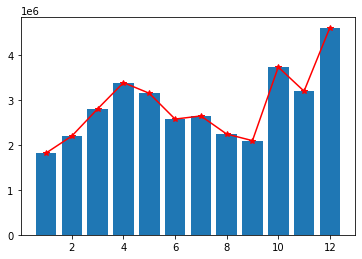

In [38]:
results = all_data.groupby('Month').sum()
months = range(1,13)
plt.plot(months, results['Sales'], 'r*-')
plt.bar(months, results['Sales'])

## What US city had the highest sales in this year (month)?

In [92]:
# inside parenthese of apply-method we add lambda function, split(address by comma separator and extract list)
# then take [1] - second element, extract city name.
#-----------------------------------------------------------------------------
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2]
#-----------------------------------------------------------------------------
#all_data['City']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['City']=all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x).split(' ')[1]})")
all_data['State']=all_data['Purchase Address'].apply(lambda x: get_state(x))
#all_data = all_data.drop(columns='Sate') # drop 'Column' column created before.
# alernative: all_data.drop(columns='Column', inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hours,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),NY 10001,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),NY 10001,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),NY 10001,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),CA 94016,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),GA 30301,12,38


In [61]:
results =  all_data.groupby('City').sum() # group all data by cities
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


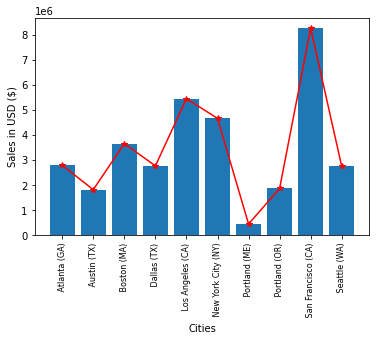

In [65]:
import matplotlib.pyplot as plt
#cities = all_data['City'].unique() # but Sales column does not coincise with City column
cities = [city for city, df in all_data.groupby('City')] # correct working
plt.bar(cities, results['Sales'])
plt.plot(cities, results['Sales'], 'r*-')
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Cities")
plt.show()

# Question 3. What time should we display  advertisements to maximize likehood of customer's buying product? 

In [74]:
# we wanna find the best time in day to show the advertisement
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hours'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hours,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),NY 10001,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),NY 10001,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),NY 10001,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),CA 94016,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),GA 30301,12,38
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City (NY),NY 10001,22,58
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland (OR),OR 97035,15,10


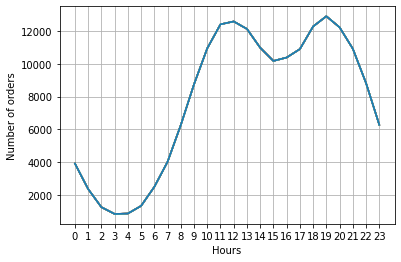

In [81]:
hours = [hour for hour, df in all_data.groupby('Hours')]
#hours
plt.plot(hours, all_data.groupby('Hours').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
#figsize(10,8)
plt.grid()
plt.show()

# What products are most often sold together?

In [83]:
all_data.head(8)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hours,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),NY 10001,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),NY 10001,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),NY 10001,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),CA 94016,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),GA 30301,12,38
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City (NY),NY 10001,22,58
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland (OR),OR 97035,15,10
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas (TX),TX 75001,9,29


In [91]:
#df = all_data[all_data['Order ID'].duplicated] # looking for duplicated and ordered them together
df = all_data[all_data['Order ID'].duplicated(keep=False)]
# group all item with the same id in one column "Grouped"
df["Grouped"] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# created dataFrame with only Order ID and Grouped columns without duplicated items with the same ID
df=df[['Order ID', "Grouped"]].drop_duplicates()
df.head(10)

/var/folders/29/r_l6cjtx36n2mgyx75d1_g640000gn/T/ipykernel_43473/543925053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [97]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

# What product sold the most? Why do you think it sold the most?


In [99]:
all_data.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hours,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),NY 10001,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),NY 10001,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),NY 10001,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),CA 94016,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),GA 30301,12,38
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City (NY),NY 10001,22,58
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland (OR),OR 97035,15,10


In [101]:
product_group = all_data.groupby('Product') # save the table with category of Product
product_group.sum() # Make summation only by products categories

,Quantity Ordered,Price Each,Month,Sales,Hours,Minutes
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


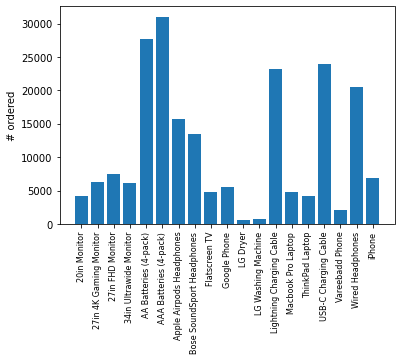

In [104]:
product_group = all_data.groupby('Product') # save the table with category of Product
quantity_ordered = product_group.sum()['Quantity Ordered']
#product_group.sum() # Make summation only by products categories
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
#plt.xlabel()
plt.ylabel('# ordered')
plt.xticks(products, rotation='vertical', size = 8)
plt.show()

## Add a second Y axis to the plot. 

/var/folders/29/r_l6cjtx36n2mgyx75d1_g640000gn/T/ipykernel_43473/3510291424.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical', size=8)


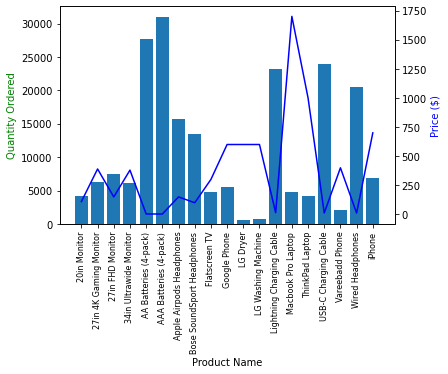

In [108]:
# prices for products

prices = all_data.groupby('Product').mean()['Price Each']
#prices
#create a plots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # x axis the same for two y axis
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products,rotation='vertical', size=8)
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
# we can show plots without 'plt.show()'

In [15]:
f_birth = pd.read_csv('daily-total-female-births-in-cal.csv', index_col=[0], parse_dates=[0])
# download csv file to system
#index_col=[0], parse_dates=[0] if don't was use default indecise 
# squeeze=True  our data set wiil be like pandas.core.series.Series

In [16]:
f_birth.head(11)

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


In [17]:
type(f_birth)

pandas.core.frame.DataFrame

In [42]:
series_value = f_birth.values

In [43]:
type(series_value)

numpy.ndarray

In [44]:
series_value

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [23]:
f_birth.size

366

In [24]:
f_birth.tail() # the last row is not correct 

,"Daily total female births in California, 1959"
Date,
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50
Daily total female births in California,1959


In [30]:
# get some information and statistics
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [31]:
f_birth = f_birth[0:365]

In [32]:
f_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='Date'>

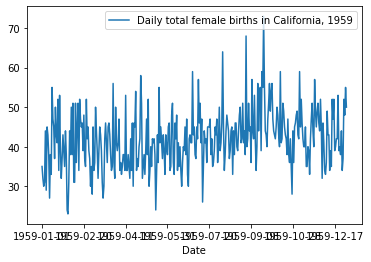

In [34]:
f_birth.plot()


# Stationary series are very important
# This technic ws used in stock market analysis
# we take the mean value of (in window=N) 

<AxesSubplot:xlabel='Date'>

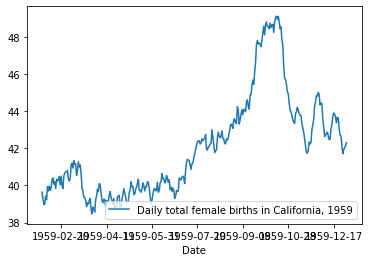

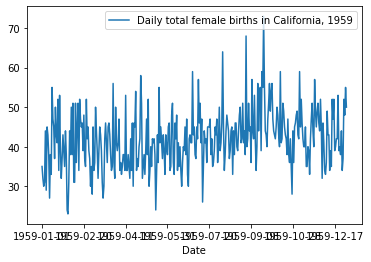

In [40]:

f_birth_mean = f_birth.rolling(window=30).mean()
f_birth_mean.plot() # moving average
f_birth.plot()

# Base line model

In [47]:
value = pd.DataFrame(series_value)

In [48]:
birth_df = pd.concat([value, value.shift(1)], axis = 1)

In [50]:
birth_df.head(5)

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [51]:
birth_df.columns = ['Actual_birth', 'Forecast_birth']

In [52]:
birth_df.head(5)

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [61]:
# remove the first row
birth_test = birth_df[1:]
birth_test

,Actual_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0
...,...,...
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0


In [62]:
birth_error = mean_squared_error(birth_test.Actual_birth, birth_test.Forecast_birth)

In [64]:
np.sqrt(birth_error) # np.sqrt(84.22252)

9.177283229394606

# ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)

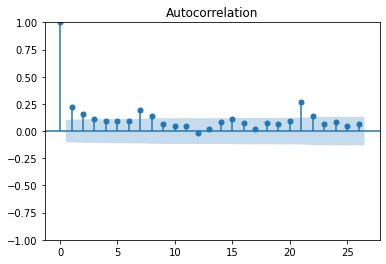

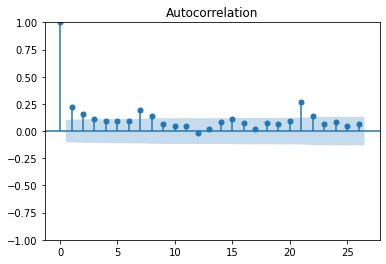

In [66]:
#-----------acf----------------------------------------------
# ARIMA(p, d, q) identify parameter Q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(f_birth) # identify value q


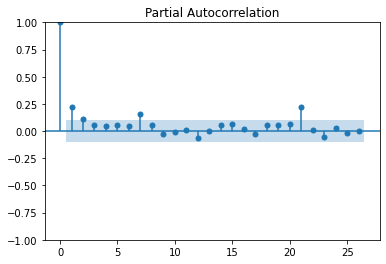

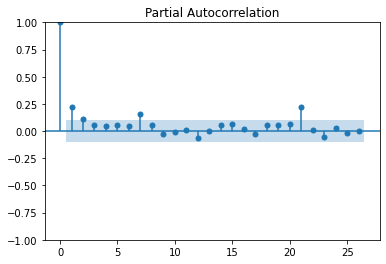

In [68]:
plot_pacf(f_birth) # identify value p

In [69]:
# p = 2,3 d = 0, q = 3,4

In [70]:
f_birth.size

365

In [72]:
birth_train = f_birth[0:330]
birth_test = f_birth[330:365]


In [73]:
birth_train.size

330

In [74]:
birth_test.size

35

In [81]:
from statsmodels.tsa.arima_model import ARIMA

In [83]:
#birth_model = ARIMA(birth_train, order=(2, 1, 3))

# SVD Transformation

In [98]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]


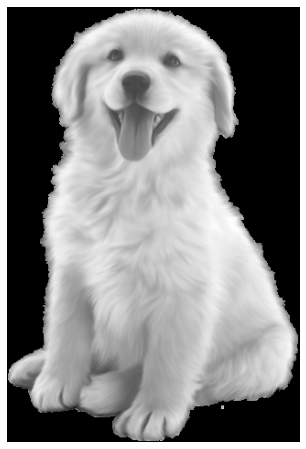

In [109]:
A=imread('dog.PNG')
X = np.mean(A,-1)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

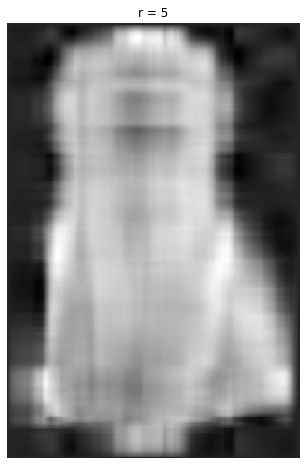

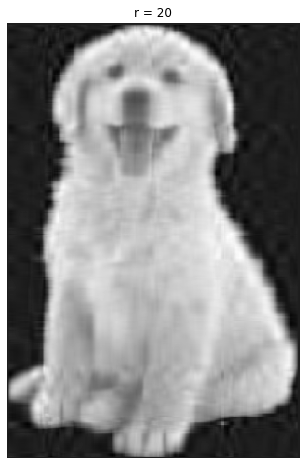

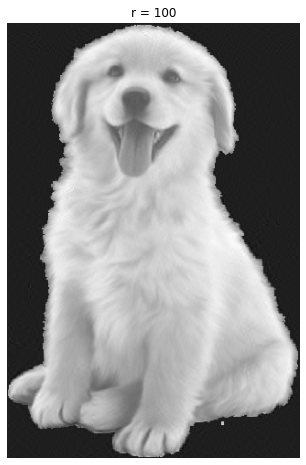

In [111]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S=np.diag(S)
j=0
# loop through the rnks of matrices
for r in (5, 20, 100):
    Xapprox=U[:,:r]@S[0:r,:r]@VT[:r,:] # take r columns U, all elemnts S, only r-rows of VT
    plt.figure(j+1)
    j+=1
    img=plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = '+str(r))
    plt.show()

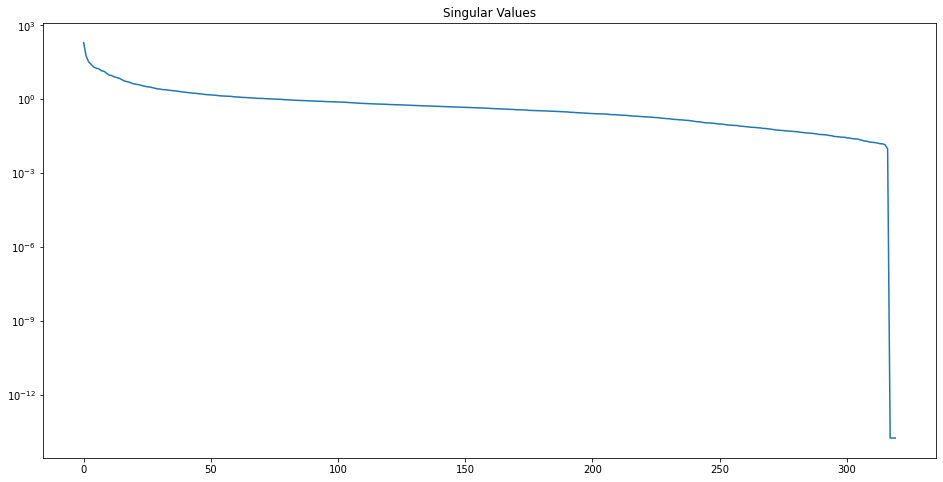

In [112]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

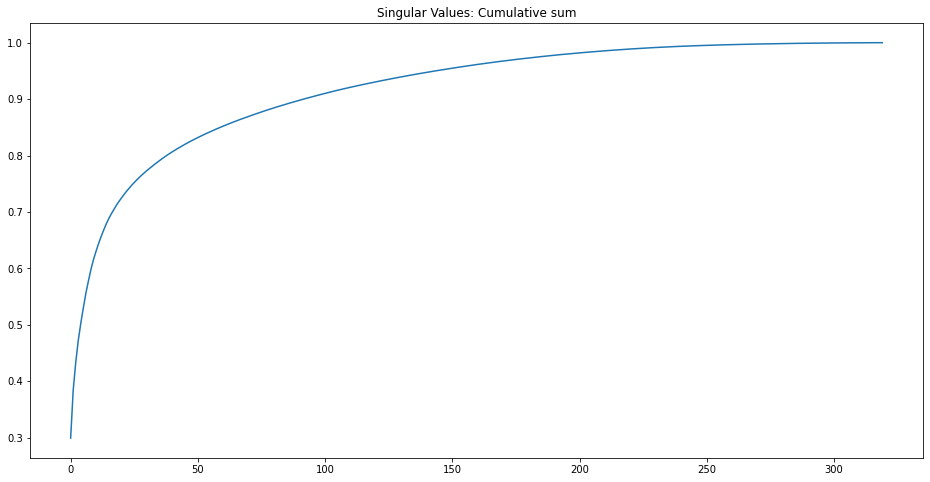

In [115]:
plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/(np.sum(np.diag(S))))
plt.title('Singular Values: Cumulative sum')
plt.show()

# LDA methods

In [140]:
import csv
import numpy as np
FILE_NAME = "spambase/spambase.data"

In [142]:
with open(FILE_NAME, 'r') as f:
    # 'r'-reading file, FILE_NAME - is a name of path to file
    # csv.reader (ourfilename, delimiter we use in our database)
    data = list(csv.reader(f, delimiter=",")) # list() - method to convert this data to the list
data = np.array(data) 
data.shape


(4601, 58)

In [143]:
data

array([['0', '0.64', '0.64', ..., '61', '278', '1'],
       ['0.21', '0.28', '0.5', ..., '101', '1028', '1'],
       ['0.06', '0', '0.71', ..., '485', '2259', '1'],
       ...,
       ['0.3', '0', '0.3', ..., '6', '118', '0'],
       ['0.96', '0', '0', ..., '5', '78', '0'],
       ['0', '0', '0.65', ..., '5', '40', '0']], dtype='<U7')